<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning/blob/main/Heart_Disease_Classification_Problem_(All_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data Preprocessing

In [3]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
data.shape

(1025, 14)

In [5]:
data = data.drop_duplicates()

In [6]:
cate_val = []
cont_val =[]
for column in data.columns:
  if data[column].nunique() <= 10:
    cate_val.append(column)
  else:
    cont_val.append(column)  

In [7]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [8]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding the Data

In [9]:
data["cp"].unique()

array([0, 1, 2, 3])

In [10]:
cate_val.remove("sex")
cate_val.remove("target")

In [11]:
data = pd.get_dummies(data,drop_first=False)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[cont_val] = scaler.fit_transform(data[cont_val])

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


Spliting the Data

In [14]:
X = data.drop("target",axis=1)
y = data["target"]

Train and Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

1) Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_predLR =log_reg.predict(X_test)
y_predLR

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

Evaluation Metrics

Accuracy_score: 0.881578947368421
f1_score: 0.888888888888889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


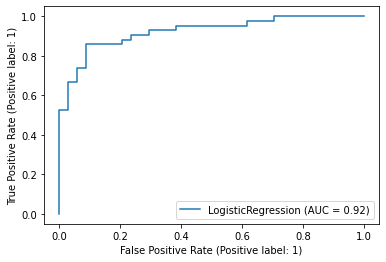

In [18]:
from sklearn.metrics import accuracy_score,plot_roc_curve ,roc_curve ,roc_auc_score, confusion_matrix, f1_score
print("Accuracy_score:",log_reg.score(X_test,y_test)) # accuracy
confusion_matrix(y_test,y_predLR)
print("f1_score:",f1_score(y_test,y_predLR))
log_reg.score(X_test,y_test)
plot_roc_curve(log_reg,X_test,y_test)

2) SVC (Support Vector Classifier)

In [19]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [20]:
y_predsvm = svm.predict(X_test)
y_predsvm

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

Evaluation Metrics

Accuracy_score: 0.868421052631579
f1_score: 0.8837209302325582


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


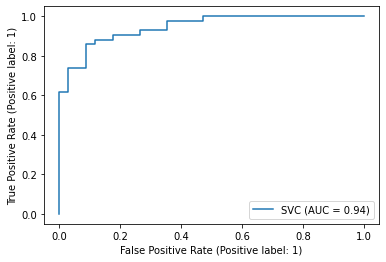

In [21]:
from sklearn.metrics import accuracy_score,plot_roc_curve ,roc_curve ,roc_auc_score, confusion_matrix, f1_score
print("Accuracy_score:",svm.score(X_test,y_test)) # accuracy
confusion_matrix(y_test,y_predsvm)
print("f1_score:",f1_score(y_test,y_predsvm))
svm.score(X_test,y_test)
plot_roc_curve(svm,X_test,y_test)

3) KNeighbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(3)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y_predKNN = KNN.predict(X_test)
y_predKNN

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

Evaluation Metrics

Accuracy_Score: 0.8552631578947368
f1_Score: 0.8705882352941177


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


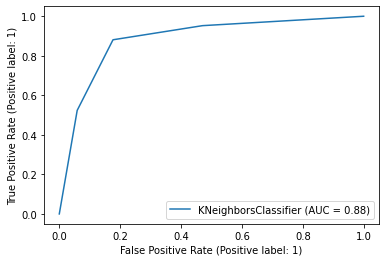

In [24]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score
print("Accuracy_Score:",KNN.score(X_test,y_test))
confusion_matrix(y_test,y_predKNN)
print("f1_Score:",f1_score(y_test,y_predKNN))
KNN.score(X_test,y_test)
plot_roc_curve(KNN,X_test,y_test)

In [25]:
import numpy as np
from sklearn.model_selection import cross_val_score
for k in range(1,25):
  KNN = KNeighborsClassifier(k)
  KNN.fit(X_train,y_train)
  print("K_value: ",k,"Train_Score: ",KNN.score(X_train,y_train),"Score: ",np.mean(cross_val_score(KNN,X_train,y_train,cv=10)))

K_value:  1 Train_Score:  1.0 Score:  0.7126482213438735
K_value:  2 Train_Score:  0.8584070796460177 Score:  0.7480237154150198
K_value:  3 Train_Score:  0.8672566371681416 Score:  0.7741106719367589
K_value:  4 Train_Score:  0.8628318584070797 Score:  0.7650197628458498
K_value:  5 Train_Score:  0.8539823008849557 Score:  0.8001976284584981
K_value:  6 Train_Score:  0.8495575221238938 Score:  0.791501976284585
K_value:  7 Train_Score:  0.831858407079646 Score:  0.7913043478260869
K_value:  8 Train_Score:  0.827433628318584 Score:  0.7650197628458498
K_value:  9 Train_Score:  0.831858407079646 Score:  0.7780632411067193
K_value:  10 Train_Score:  0.8141592920353983 Score:  0.765217391304348
K_value:  11 Train_Score:  0.8141592920353983 Score:  0.7828063241106719
K_value:  12 Train_Score:  0.8141592920353983 Score:  0.7916996047430829
K_value:  13 Train_Score:  0.7964601769911505 Score:  0.7869565217391303
K_value:  14 Train_Score:  0.7964601769911505 Score:  0.7960474308300396
K_value

Non-Linear Machine Learning

In [26]:
data = pd.read_csv("/content/heart.csv")

In [27]:
data = data.drop_duplicates()

In [28]:
X = data.drop("target",axis = 1)
y = data["target"]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

4) Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
y_predDT = DT.predict(X_test)
y_predDT

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

Evaluation Metrics

Accuracy_Score: 0.8421052631578947
f1_Score: 0.8604651162790697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


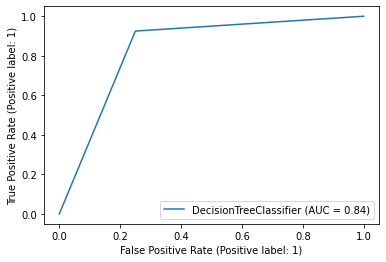

In [32]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score
print("Accuracy_Score:",DT.score(X_test,y_test))
confusion_matrix(y_test,y_predDT)
print("f1_Score:",f1_score(y_test,y_predDT))
DT.score(X_test,y_test)
plot_roc_curve(DT,X_test,y_test)

5) Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_predRF = RF.predict(X_test)
y_predRF

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

Evaluation Metrics

Accuracy_Score: 0.8421052631578947
f1_Score: 0.8571428571428572


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


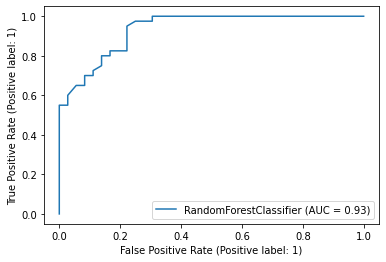

In [35]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score
print("Accuracy_Score:",RF.score(X_test,y_test))
confusion_matrix(y_test,y_predRF)
print("f1_Score:",f1_score(y_test,y_predRF))
RF.score(X_test,y_test)
plot_roc_curve(RF,X_test,y_test)

6) Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [37]:
y_predGBC = GBC.predict(X_test)
y_predGBC

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

Evaluation Metrics

Accuracy_Score: 0.7894736842105263
f1_Score: 0.813953488372093


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


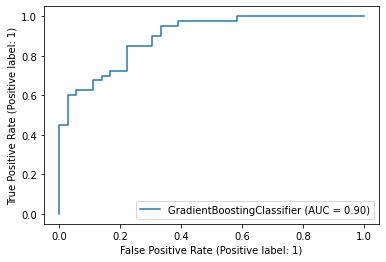

In [38]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score
print("Accuracy_Score:",GBC.score(X_test,y_test))
confusion_matrix(y_test,y_predGBC)
print("f1_Score:",f1_score(y_test,y_predGBC))
GBC.score(X_test,y_test)
plot_roc_curve(GBC,X_test,y_test)

Comparision of Evaluation Metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

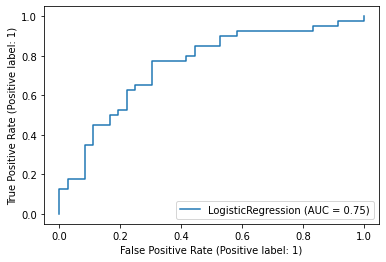

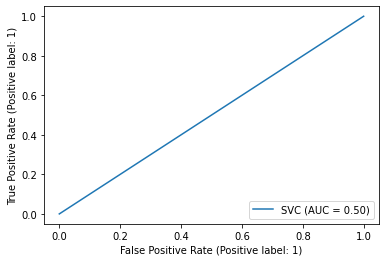

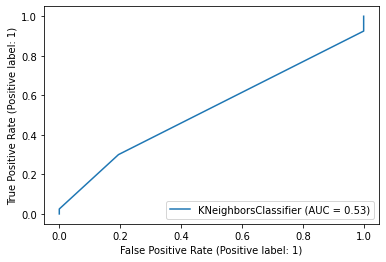

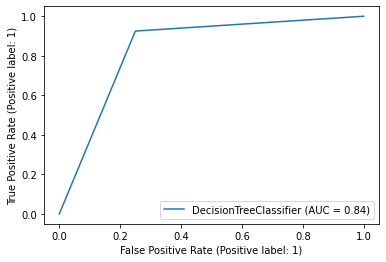

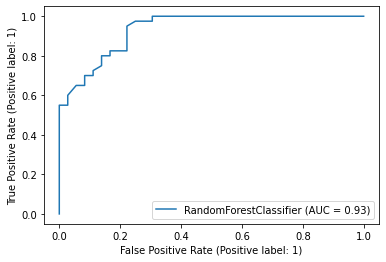

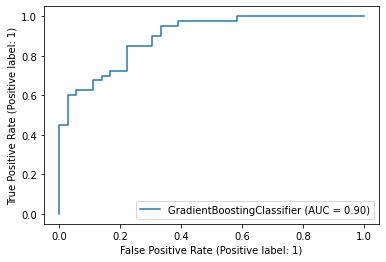

In [57]:
final_data = pd.DataFrame({
    "Models":["LR","SVM","KNN","DT","RF","GB"],
    "Accuracy_Score":[accuracy_score(y_test,y_predLR),
                       accuracy_score(y_test,y_predsvm),
                       accuracy_score(y_test,y_predKNN),
                       accuracy_score(y_test,y_predDT),
                       accuracy_score(y_test,y_predRF),
                       accuracy_score(y_test,y_predGBC)
                       ],
     "f1_score":[f1_score(y_test,y_predLR),
                 f1_score(y_test,y_predsvm),
                 f1_score(y_test,y_predKNN),
                 f1_score(y_test,y_predDT),
                 f1_score(y_test,y_predRF),
                 f1_score(y_test,y_predGBC)
                 ],
      "AUROC_Curve":[plot_roc_curve(log_reg,X_test,y_test),
                     plot_roc_curve(svm,X_test,y_test),
                     plot_roc_curve(KNN,X_test,y_test),
                     plot_roc_curve(DT,X_test,y_test),
                     plot_roc_curve(RF,X_test,y_test),
                     plot_roc_curve(GBC,X_test,y_test)]})
                     
                                  


In [58]:
final_data

,Models,Accuracy_Score,f1_score,AUROC_Curve
0,LR,0.513158,0.531646,<sklearn.metrics._plot.roc_curve.RocCurveDispl...
1,SVM,0.500000,0.547619,<sklearn.metrics._plot.roc_curve.RocCurveDispl...
2,KNN,0.539474,0.578313,<sklearn.metrics._plot.roc_curve.RocCurveDispl...
3,DT,0.842105,0.860465,<sklearn.metrics._plot.roc_curve.RocCurveDispl...
4,RF,0.842105,0.857143,<sklearn.metrics._plot.roc_curve.RocCurveDispl...
5,GB,0.789474,0.813953,<sklearn.metrics._plot.roc_curve.RocCurveDispl...


EDA

In [59]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


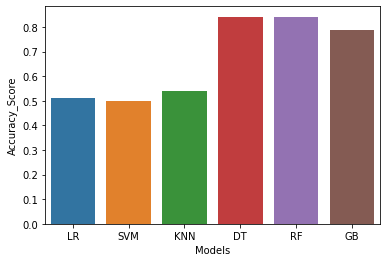

In [60]:
sns.barplot(final_data["Models"],final_data["Accuracy_Score"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


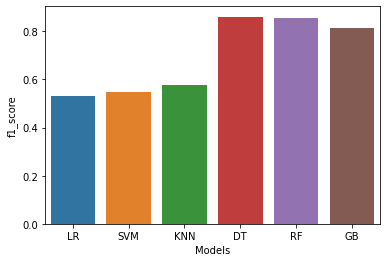

In [62]:
sns.barplot(final_data["Models"],final_data["f1_score"])

Prediction New Data

In [64]:
X = data.drop("target",axis = 1)
y = data["target"]

In [66]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
new_data = pd.DataFrame({
    "age":45,
    "sex":1,
    "cp":0,
    "trestbps":125,
    "chol":212,
    "fbs":0,
    "restecg":1,
    "thalach":168,
    "exang":0,
    "oldpeak":1.0,
    "slope":2,
    "ca":2,
    "thal":3,
},index=[0])

In [68]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,45,1,0,125,212,0,1,168,0,1.0,2,2,3


In [70]:
person = RF.predict(new_data)
if person[0] == 0:
  print("No Disease")
else:
  print("Disease")  

No Disease
